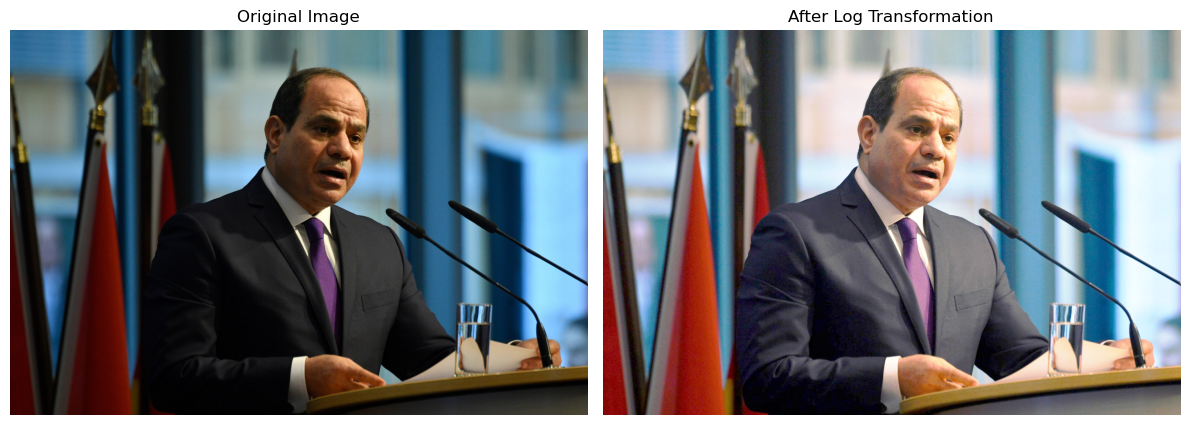

Image processed successfully!


In [4]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

image_path = r"C:\Users\fares\OneDrive\Desktop\151800.jpg"

try:
    original_image = Image.open(image_path).convert('RGB')

    def log_transform_color(image, c=40):
        img_array = np.array(image).astype(np.float64)
        log_transformed = c * np.log1p(img_array)
        # بدل الـ normalization بناءً على القيمة القصوى، استخدم نطاق ثابت
        normalized = np.clip(log_transformed, 0, 255).astype(np.uint8)
        return Image.fromarray(normalized)

    enhanced_image = log_transform_color(original_image)

    r, g, b = enhanced_image.split()
    r_eq = ImageOps.equalize(r)
    g_eq = ImageOps.equalize(g)
    b_eq = ImageOps.equalize(b)
    final_image = Image.merge("RGB", (r_eq, g_eq, b_eq))

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(final_image)
    plt.title("After Log Transformation")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("Image processed successfully!")

except FileNotFoundError:
    print("Error: Image not found! Please check the path.")
except Exception as e:
    print(f"An error occurred: {e}")